<a href="https://colab.research.google.com/github/aartiruhil/Machine-Learning-Projects/blob/main/Weight_Prediction_Using_Gender_and_Height.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weight Prediction Using Gender and Height

Importing nessary modules

1. Pandas: for working with datasets. 
            It has functions for analyzing, cleaning, exploring and manipulating data.
2. Numpy: for performing a wide variety of mathematical operations on array.

In [34]:
import pandas as pd

Reading a csv file

In [35]:
data = pd.read_csv("/content/weight-height.csv")

In [36]:
#top 5 rows from dataset
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [37]:
#information of data: its type and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [38]:
#shape i.e number pf rows and columns
data.shape

(10000, 3)

In [39]:
#describing its count, mean, sum etc.
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [40]:
#checking for null values
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. 



> It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.



In [41]:
#label encoding
from sklearn.preprocessing import LabelEncoder

LabelEncoder is a very efficient tool for encoding the levels of categorical features into numeric values.


> LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier

In [42]:
encoder = LabelEncoder()

The fit_transform() method is used to fit the data into a model and transform it into a form that is more suitable for the model in a single step.

In [43]:
data["Gender"] = encoder.fit_transform(data["Gender"])

In [44]:
#printing top 5 rows of data
data.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [45]:
#couting types of data in column gender
data["Gender"].value_counts()

1    5000
0    5000
Name: Gender, dtype: int64

In [46]:
#visualization Library
import seaborn as sns

<Axes: xlabel='Gender', ylabel='count'>

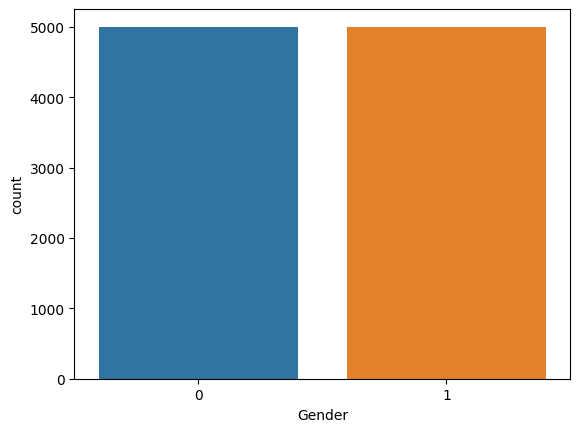

In [47]:
#plotting gender
sns.countplot(x=data["Gender"], data=data)

In [48]:
#seprating the data 
x = data.drop(columns = "Weight", axis = 1)
y = data["Weight"]

In [49]:
#train_test_split helps us create our training data and test data
from sklearn.model_selection import train_test_split

#trainig set = 80% and test data = 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [50]:
#overall data divided
x.shape, x_train.shape, x_test.shape

((10000, 2), (8000, 2), (2000, 2))

In [51]:
#model creation
from sklearn.linear_model import LinearRegression

In [52]:
#creating a model using Linear Regression
model = LinearRegression()

In [53]:
#fitting our data in linear regression model
#training phase
model.fit(x_train, y_train)

LinearRegression()

In [54]:
#predicting the test data
prediction = model.predict(x_test)

In [55]:
#r2_score: the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
from sklearn.metrics import r2_score

In [56]:
score = r2_score(prediction, y_test)

In [57]:
score

0.8942026073927826

 ***Our model is 89% accurate.***

#Testing our model on new data

In [58]:
#Building a predictive system
new_data = [(0, 74)]
weight = model.predict(new_data)
print(weight)
print(weight*.45)

[197.2481918]
[88.76168631]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
